In [2258]:
import pandas as pd
import random 
import numpy as np
import matplotlib.pyplot as plt

Завдання 1.1

In [2259]:
n = 80
list_of_values = []
stat_mat = []
k = 12

for i in range (11):
	list_of_values.append(i+12)

for i in range(n):
	stat_mat.append(random.randint(k,k+10))

print(f"Статистичний матеріал на проміжку {k , k+10}: ")
print(stat_mat)


Статистичний матеріал на проміжку (12, 22): 
[15, 21, 15, 21, 16, 15, 21, 18, 20, 18, 22, 22, 19, 13, 15, 20, 13, 16, 17, 13, 19, 17, 17, 22, 12, 17, 17, 18, 20, 21, 13, 17, 12, 15, 12, 17, 22, 14, 14, 21, 20, 13, 18, 15, 14, 12, 16, 20, 14, 19, 13, 14, 18, 12, 20, 14, 18, 16, 20, 22, 19, 18, 17, 15, 21, 16, 22, 19, 20, 21, 12, 13, 16, 21, 13, 14, 17, 21, 16, 15]


In [2260]:
print(f"Варіацйний ряд: ")
stat_mat.sort()
print(stat_mat)

Варіацйний ряд: 
[12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22]


In [2261]:
list_of_amount = []

for i in range(12,23):
	temp = []
	for j in stat_mat:
		if (j == i):
			temp.append(j)
	list_of_amount.append(len(temp))

columns = ['Values', 'Amount']

var_series = pd.DataFrame(columns=columns)
var_series['Values'] = list_of_values
var_series['Amount'] = list_of_amount
var_series = var_series.set_index('Values')

print('Частотна таблиця')
display(var_series.T)

Частотна таблиця


Values,12,13,14,15,16,17,18,19,20,21,22
Amount,6,8,7,8,7,9,7,5,8,9,6


<Axes: title={'center': 'Діаграма частот'}, xlabel='Values'>

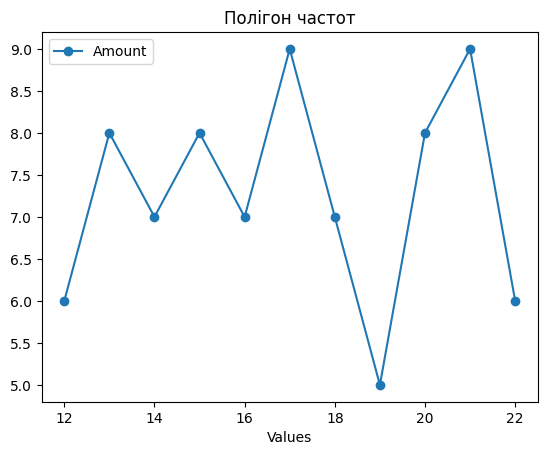

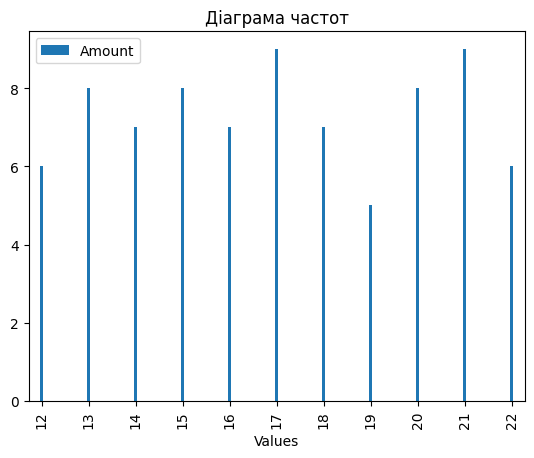

In [2262]:
var_series.plot(kind="line", style='-o' ,title="Полігон частот")
var_series.plot(kind="bar",title="Діаграма частот", width = 0.05)

In [2263]:
list_of_probabilities = []
temp = 0
for i in list_of_amount:
	temp += i
	list_of_probabilities.append(temp/n)

Values,x<12,12<=x<13,13<=x<14,14<=x<15,15<=x<16,16<=x<17,17<=x<18,18<=x<19,19<=x<20,20<=x<21,21<=x<22,x=22,x>22
Probability,0.0,0.075,0.175,0.2625,0.3625,0.45,0.5625,0.65,0.7125,0.8125,0.925,1.0,1.0


<Axes: title={'center': 'Eмпірична функція розподілу'}, xlabel='Values'>

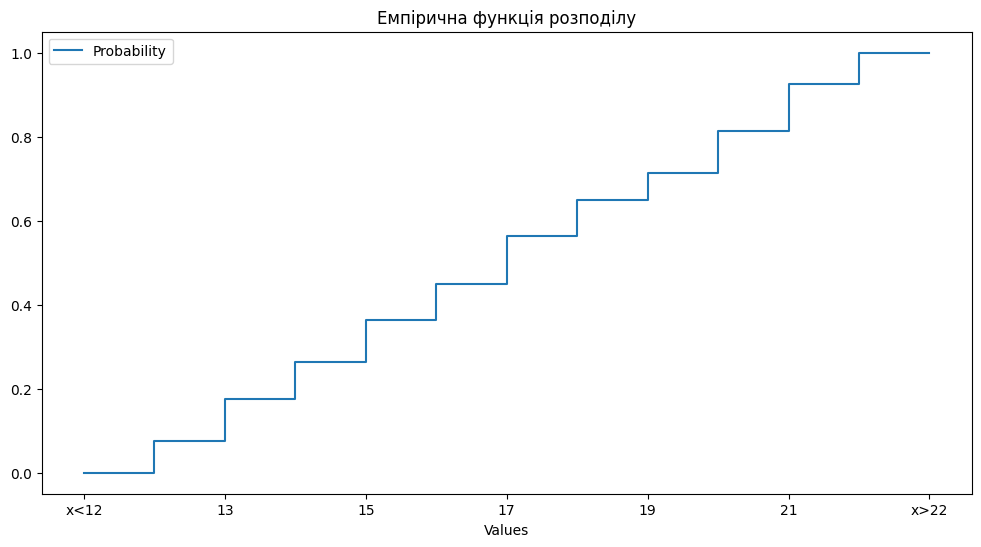

In [2264]:
displayed_list = ['x<12', '12<=x<13','13<=x<14','14<=x<15','15<=x<16','16<=x<17','17<=x<18','18<=x<19','19<=x<20','20<=x<21','21<=x<22','x=22','x>22']
list_of_emp_func_values = list_of_values.copy()
list_of_emp_func_prob = list_of_probabilities.copy()
columns = ['Values', 'Probability']
list_of_emp_func_values.append('x>22')
list_of_emp_func_values.insert(0,'x<12')
list_of_emp_func_prob.insert(0, 0)
list_of_emp_func_prob.append(1)
emp_func = pd.DataFrame(columns= columns)
emp_func["Values"] = list_of_emp_func_values
emp_func["Probability"] = list_of_emp_func_prob
emp_func = emp_func.set_index('Values')
df = pd.DataFrame(columns=columns)
df["Values"] = displayed_list
df["Probability"] = list_of_emp_func_prob
df = df.set_index("Values")
display(df.T)
emp_func.plot(drawstyle="steps-post", title="Eмпірична функція розподілу", figsize=(12,6))

In [2265]:
def moda(df):
	result = df["Amount"].idxmax()
	return result

In [2266]:
def mediana(list_val):
	if (len(list_val) % 2 == 0):
		first_id = int(len(list_val)/2)
		second_id = first_id + 1
		return (list_val[first_id] + list_val[second_id]) / 2
	else:
		return int(len(list_val)/2 + 1)

In [2267]:
def avg(list_val, list_am):
	sum = 0
	for i in range(len(list_val)):
		sum += list_val[i] * list_am[i]
	return sum/len(stat_mat)

In [2268]:
def deviation(list_val, list_am):
	sum = 0
	for i in range(len(list_val)):
		sum += ((list_val[i] - avg(list_val, list_am))**2) * list_am[i]
	return sum

In [2269]:
def dev_cube(list_val, list_am):
	sum = 0
	if len(list_val) == len(list_am):
		for i in range(len(list_val)):
			sum += ((list_val[i] - avg(list_val, list_am))**3) * list_am[i]
		return sum

In [2270]:
def dev_fourth(list_val, list_am):
	sum = 0
	for i in range(len(list_val)):
		sum += ((list_val[i] - avg(list_val, list_am))**4) * list_am[i]
	return sum

In [2271]:
def Q(stat_mat):
	first_Q = stat_mat[int(len(stat_mat)/4 - 1)]
	second_Q = stat_mat[int((2*len(stat_mat))/4 - 1)]
	third_Q = stat_mat[int((3*len(stat_mat)/4) - 1)]

	return first_Q, second_Q, third_Q

In [2272]:
variance = deviation(list_of_values,list_of_amount)/(len(stat_mat) - 1)
first_quartile, second_quartile, third_quartile = Q(stat_mat)
dispersion = deviation(list_of_values, list_of_amount) / len(stat_mat)

In [2273]:
print("Числові характеристики: ")
print(f"Мода:{moda(var_series)}")
print(f"Медіана:{mediana(stat_mat)}")
print(f"Середнє статистичне:{avg(list_of_values, list_of_amount)}")
print(f"Розмах:{list_of_values[10] - list_of_values[0]}")
print(f"Девіація:{deviation(list_of_values, list_of_amount)}")
print(f"Варіанса:{variance}")
print(f"Стандарт:{np.sqrt(variance)}")
print(f"Варіація:{np.sqrt(variance)/avg(list_of_values, list_of_amount)}")
print(f"Вибіркова дисперсія:{dispersion}")
print(f"Вибіркове середнє квадратичне відхилення:{np.sqrt(dispersion)}")
print(f"Квартиль:")
print(f"Перший квартиль:{first_quartile}")
print(f"Другий квартиль:{second_quartile}")
print(f"Третій квартиль:{third_quartile}")
print(f"Інтерквартильна широта:{third_quartile - first_quartile}")
print(f"Другий центральний момент:{dispersion}")
print(f"Третій центральний момент:{1/n * dev_cube(list_of_values, list_of_amount)}")
print(f"Четвертий центральний момент:{1/n * dev_fourth(list_of_values, list_of_amount)}")
print(f"Асиметрія:{1/n * dev_cube(list_of_values, list_of_amount) / np.sqrt(dispersion) ** 3}")
print(f"Ексцес:{1/n * dev_fourth(list_of_values, list_of_amount) / dispersion**2 - 3}")


Числові характеристики: 
Мода:17
Медіана:17.0
Середнє статистичне:17.0125
Розмах:10
Девіація:772.9875000000001
Варіанса:9.784651898734179
Стандарт:3.1280428223945687
Варіація:0.18386732240379539
Вибіркова дисперсія:9.662343750000002
Вибіркове середнє квадратичне відхилення:3.1084310753175792
Квартиль:
Перший квартиль:14
Другий квартиль:17
Третій квартиль:20
Інтерквартильна широта:6
Другий центральний момент:9.662343750000002
Третій центральний момент:0.47516015625002556
Четвертий центральний момент:166.07968352050784
Асиметрія:0.015820357399813172
Ексцес:-1.2210999775806195


Завдання 1.2

Інтервальний розподіл варіанти


Values,"[12.0,13.428571428571429)","[13.428571428571429,14.857142857142858)","[14.857142857142858,16.285714285714285)","[16.285714285714285,17.714285714285715)","[17.714285714285715,19.142857142857142)","[19.142857142857142,20.57142857142857)","[20.57142857142857,22.0]"
Amount,14,7,15,9,12,8,15


<Axes: title={'center': 'Гістограма частот'}, xlabel='Values'>

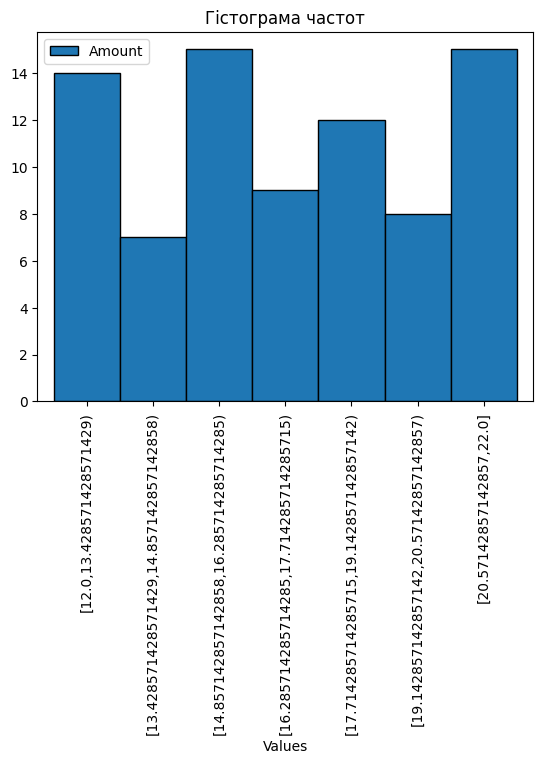

In [2274]:
number_of_intervals = 1 + int(np.log2(n))

values_list = np.linspace(12,22, num=number_of_intervals+1)

amount_list = []

for i in range (1,number_of_intervals+1):
	temp = []
	for j in stat_mat:
		if i == number_of_intervals: 
			if j >= values_list[i-1]:
				temp.append(j)
		else:
			if (j < values_list[i] and j >= values_list[i-1]):
				temp.append(j)
	amount_list.append(len(temp))

values = []
for i in range(1,len(values_list)):
	if  i == len(values_list) - 1:
		values.append(f"[{values_list[i-1]},{values_list[i]}]")
	else:
		values.append(f"[{values_list[i-1]},{values_list[i]})")

interval_data = pd.DataFrame()
interval_data['Values'] = values
interval_data['Amount'] = amount_list
interval_data = interval_data.set_index('Values')

print("Інтервальний розподіл варіанти")
display(interval_data.T)
interval_data.plot(kind = "bar", width = 1, edgecolor = "black", title = "Гістограма частот")

Values,x<12,"[12.0,13.428571428571429)","[13.428571428571429,14.857142857142858)","[14.857142857142858,16.285714285714285)","[16.285714285714285,17.714285714285715)","[17.714285714285715,19.142857142857142)","[19.142857142857142,20.57142857142857)","[20.57142857142857,22.0]",x>22
Probability,0.0,0.175,0.2625,0.45,0.5625,0.7125,0.8125,1.0,1.0


<Axes: xlabel='Values'>

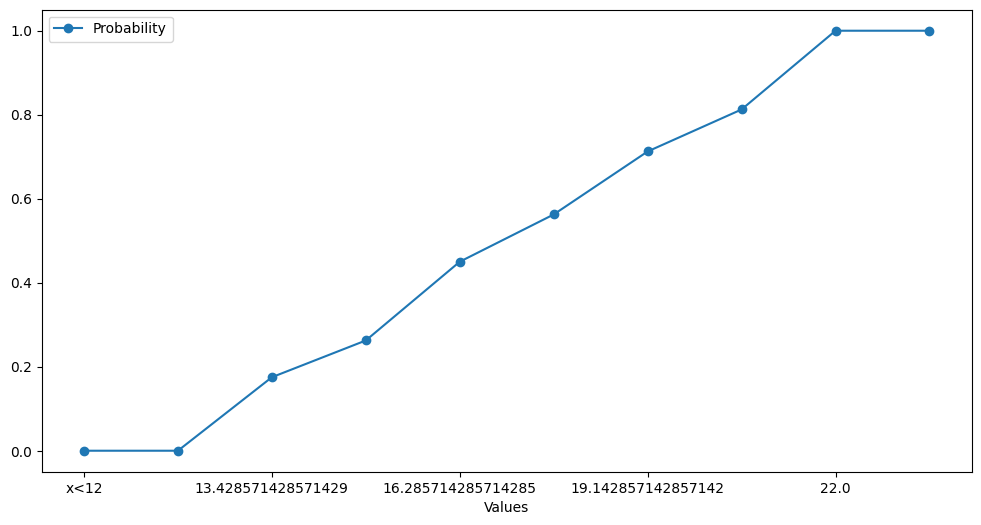

In [2275]:
prob_list = []
temp = 0
for i in amount_list:
	temp += i
	prob_list.append(temp/n)

prob_list.insert(0,0)
prob_list.insert(0,0)
prob_list.append(1)
v = list(values_list)
v.append('x>22')
v.insert(0, 'x<12')
emp_func = pd.DataFrame()
emp_func['Values'] = v
emp_func['Probability'] = prob_list
emp_func = emp_func.set_index('Values')
values.insert(0,'x<12')
values.append('x>22')
del prob_list[0]
df_display = pd.DataFrame()
df_display["Values"] = values
df_display["Probability"] = prob_list
df_display = df_display.set_index('Values')
display(df_display.T)
emp_func.plot(style = "-o", figsize=(12,6))


In [2276]:
h = (22 - 12)/number_of_intervals

In [2277]:
def mod(amount):
  temp = amount.index(max(amount_list))  
  f1 = amount[temp]  
  f0 = amount[temp - 1] if temp > 0 else 0
  f2 = amount[temp + 1] if temp < len(amount) - 1 else 0
  L = values_list[temp]  
  result = L + ((f1 - f0) * h) / ((f1 - f0) + (f1 - f2))
  return result

In [2278]:
def find_median_interval(amount):
    total = sum(amount)
    half_total = total / 2

    left_sum = 0 
    for i, a in enumerate(amount):
        left_sum += a
        if left_sum >= half_total:
            return i - 1

In [2279]:
def med(amount, value):
	temp = find_median_interval(amount)
	sum = 0
	for i in range(temp - 1):
		sum += amount[i]
	result = value[temp] + h/amount[temp] * (n / 2 - sum)
	return result

In [2280]:
def average(amount, values):
	current = values[0] + h/2
	i = 0
	sum = 0
	while (current <= values[7]):
		sum += current * amount[i]
		i += 1
		current += h
	res = sum / n
	return res

In [2281]:
def devN(values, amount):
	current = values[0] + h/2
	sum = 0
	i = 0
	while (current <= values[number_of_intervals]):
		sum += (current - average(amount, values))**2 * amount[i] 
		current += h
		i+=1
	return sum

In [2282]:
def dev3N(values, amount):
	current = values[0] + h/2
	sum = 0
	i = 0
	while (current <= values[number_of_intervals]):
		sum += (current - average(amount, values))**3 * amount[i] 
		current += h
		i+=1
	return sum

In [2283]:
def dev4N(values, amount):
	current = values[0] + h/2
	sum = 0
	i = 0
	while (current < values[number_of_intervals]):
		sum += (current - average(amount, values))**4 * amount[i] 
		current += h
		i+=1
	return sum

In [2284]:
print("Числові характеристики: ")
print(f"Мода:{mod(amount_list)}")
print(f"Медіана:{med(amount_list, values_list)}")
print(f"Середнє статистичне:{average(amount_list, values_list)}")
print(f"Розмах:{values_list[7] - values_list[0]}")
print(f"Девіація:{devN(values_list, amount_list)}")
print(f"Варіанса:{devN(values_list, amount_list)/(n-1)}")
print(f"Стандарт:{np.sqrt(devN(values_list, amount_list)/(n-1))}")
print(f"Варіація:{np.sqrt(devN(values_list, amount_list)/(n-1)) / devN(values_list, amount_list)}")
print(f"Вибіркова дисперсія:{devN(values_list, amount_list) / n}")
print(f"Вибіркове середнє квадратичне відхилення:{np.sqrt(devN(values_list, amount_list) / n)}")
m2 = devN(values_list, amount_list) / n
print(f"Другий центральний момент:{m2}")
m3 = 1/n * dev3N(values_list, amount_list)
print(f"Третій центральний момент:{m3}")
m4 = 1/n * dev4N(values_list, amount_list)
print(f"Четвертий центральний момент:{m4}")
print(f"Асиметрія:{m3 / m2 ** 1.5}")
print(f"Ексцес:{(m4 / m2 ** 2) - 3}")


Числові характеристики: 
Мода:15.673469387755102
Медіана:17.333333333333336
Середнє статистичне:17.035714285714285
Розмах:10.0
Девіація:710.1020408163258
Варіанса:8.988633428054758
Стандарт:2.998104972821125
Варіація:0.004222076265792076
Вибіркова дисперсія:8.876275510204072
Вибіркове середнє квадратичне відхилення:2.9793078911391606
Другий центральний момент:8.876275510204072
Третій центральний момент:0.21510568513115802
Четвертий центральний момент:136.0945911208869
Асиметрія:0.00813402921636466
Ексцес:-1.272654083931873


Завдання 1.3

In [2285]:
n = 80
list_of_values = []
stat_mat = []
k = 12

for i in range (11):
	list_of_values.append(i+12)

for i in range(n):
	stat_mat.append(random.uniform(k,k+10))

print(f"Статистичний матеріал на проміжку {k , k+10}: ")
print(stat_mat)

Статистичний матеріал на проміжку (12, 22): 
[17.488165691216338, 18.675803295502526, 13.418381313105943, 14.92528305547432, 18.52462020404482, 16.2759639377672, 20.164519773102295, 20.7759934495638, 19.70996512182503, 21.30136243672699, 12.571368849862232, 15.065105333876076, 18.968321009072213, 20.35993621422518, 17.553013836228853, 16.985858043839055, 14.506465505968317, 17.093729643271367, 12.593423693654065, 20.66474461607627, 15.205734788321463, 16.93464466621799, 15.731622386951111, 20.037782114815457, 20.80426993519977, 16.362406967544985, 17.221100003792536, 19.461028565333528, 12.761384010837762, 14.760539761749913, 15.026801615983732, 17.98747157128099, 14.894127546872733, 17.340318280193966, 12.882711853628523, 14.023804812696365, 19.585848005671917, 18.764260081502986, 12.247117354853833, 17.549236675885503, 14.388506184997958, 15.588905301628419, 18.52456281735498, 19.83108358287504, 21.983092707844904, 19.952068394732308, 20.692816641149093, 19.616492270159437, 21.862762

Інтервальний статистичний розподіл


Values,"[12.0,13.428571428571429)","[13.428571428571429,14.857142857142858)","[14.857142857142858,16.285714285714285)","[16.285714285714285,17.714285714285715)","[17.714285714285715,19.142857142857142)","[19.142857142857142,20.57142857142857)","[20.57142857142857,22.0]"
Amount,11,8,13,11,13,11,13


<Axes: title={'center': 'Гістограма частот'}, xlabel='Values'>

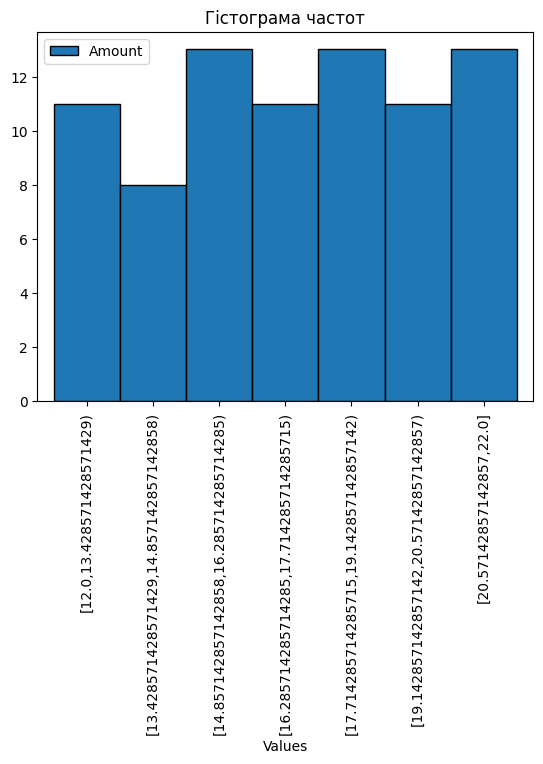

In [2286]:
number_of_intervals = 1 + int(np.log2(n))

values_list = np.linspace(12,22, num=number_of_intervals+1)

amount_list = []

for i in range (1,number_of_intervals+1):
	temp = []
	for j in stat_mat:
		if i == number_of_intervals: 
			if j >= values_list[i-1]:
				temp.append(j)
		else:
			if (j < values_list[i] and j >= values_list[i-1]):
				temp.append(j)
	amount_list.append(len(temp))

values = []
for i in range(1,len(values_list)):
	if  i == len(values_list) - 1:
		values.append(f"[{values_list[i-1]},{values_list[i]}]")
	else:
		values.append(f"[{values_list[i-1]},{values_list[i]})")

interval_data = pd.DataFrame()
interval_data['Values'] = values
interval_data['Amount'] = amount_list
interval_data = interval_data.set_index('Values')

print("Інтервальний статистичний розподіл")
display(interval_data.T)
interval_data.plot(kind = "bar", width = 1, edgecolor = "black", title = "Гістограма частот")

Values,x<12,"[12.0,13.428571428571429)","[13.428571428571429,14.857142857142858)","[14.857142857142858,16.285714285714285)","[16.285714285714285,17.714285714285715)","[17.714285714285715,19.142857142857142)","[19.142857142857142,20.57142857142857)","[20.57142857142857,22.0]",x>22
Probability,0.0,0.1375,0.2375,0.4,0.5375,0.7,0.8375,1.0,1.0


<Axes: xlabel='Values'>

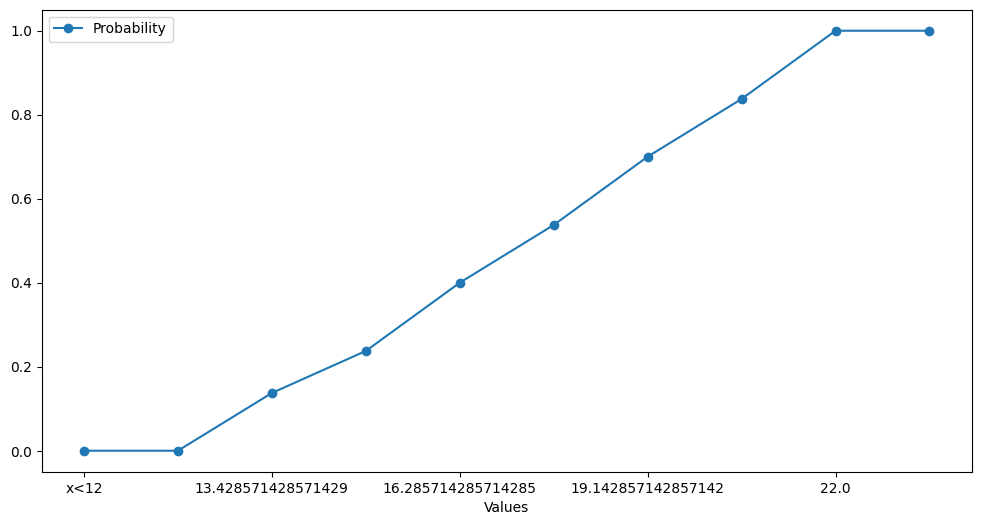

In [2287]:
prob_list = []
temp = 0
for i in amount_list:
	temp += i
	prob_list.append(temp/n)

prob_list.insert(0,0)
prob_list.insert(0,0)
prob_list.append(1)
v = list(values_list)
v.append('x>22')
v.insert(0, 'x<12')
emp_func = pd.DataFrame()
emp_func['Values'] = v
emp_func['Probability'] = prob_list
emp_func = emp_func.set_index('Values')
values.insert(0,'x<12')
values.append('x>22')
del prob_list[0]
df_display = pd.DataFrame()
df_display["Values"] = values
df_display["Probability"] = prob_list
df_display = df_display.set_index('Values')
display(df_display.T)
emp_func.plot(style = "-o", figsize=(12,6))

In [2288]:
print("Числові характеристики: ")
print(f"Мода:{mod(amount_list)}")
print(f"Медіана:{med(amount_list, values_list)}")
print(f"Середнє статистичне:{average(amount_list, values_list)}")
print(f"Розмах:{values_list[7] - values_list[0]}")
print(f"Девіація:{devN(values_list, amount_list)}")
print(f"Варіанса:{devN(values_list, amount_list)/(n-1)}")
print(f"Стандарт:{np.sqrt(devN(values_list, amount_list)/(n-1))}")
print(f"Варіація:{np.sqrt(devN(values_list, amount_list)/(n-1)) / devN(values_list, amount_list)}")
print(f"Вибіркова дисперсія:{devN(values_list, amount_list) / n}")
print(f"Вибіркове середнє квадратичне відхилення:{np.sqrt(devN(values_list, amount_list) / n)}")
m2 = devN(values_list, amount_list) / n
print(f"Другий центральний момент:{m2}")
m3 = 1/n * dev3N(values_list, amount_list)
print(f"Третій центральний момент:{m3}")
m4 = 1/n * dev4N(values_list, amount_list)
print(f"Четвертий центральний момент:{m4}")
print(f"Асиметрія:{m3 / m2 ** 1.5}")
print(f"Ексцес:{(m4 / m2 ** 2) - 3}")


Числові характеристики: 
Мода:15.877551020408164
Медіана:18.043956043956044
Середнє статистичне:17.21428571428571
Розмах:10.0
Девіація:645.3061224489791
Варіанса:8.168431929733913
Стандарт:2.858046873256965
Варіація:0.004428978393092707
Вибіркова дисперсія:8.066326530612239
Вибіркове середнє квадратичне відхилення:2.840127907438719
Другий центральний момент:8.066326530612239
Третій центральний момент:-2.3527696793002875
Четвертий центральний момент:118.18036755518513
Асиметрія:-0.10269888223809748
Ексцес:-1.1836742531988622
